In [1]:
import os

import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import pandas as pd
import xarray as xr

PATH = "/Users/nikola/work-brain/eeg_microstate_and_latent_space/results/20211111_EEG_ECvsEO_spectral_diffs"

plt.style.use("default_light")

In [2]:
df = xr.open_dataarray(
    os.path.join(PATH, "epochs_bands_envelopes.nc"), engine="netcdf4"
)
df.name = "band_envelopes"

In [3]:
df

<xarray.DataArray 'band_envelopes' (band: 5, channels: 61, time: 601, data_type: 2, subject_id: 203)>
[74421830 values with dtype=float64]
Coordinates:
  * channels    (channels) object 'AF3' 'AF4' 'AF7' 'AF8' ... 'T8' 'TP7' 'TP8'
  * time        (time) float64 0.0 0.004 0.008 0.01 ... 1.99 1.992 1.996 2.0
  * band        (band) object 'Delta' 'Theta' 'Alpha' 'Beta' 'Gamma'
  * data_type   (data_type) object 'EC' 'EO'
  * subject_id  (subject_id) object 'sub-010002' 'sub-010003' ... 'sub-010321'

In [4]:
df = df.mean("time").to_dataframe().reset_index()

In [5]:
df.head()

,band,channels,data_type,subject_id,band_envelopes
0,Delta,AF3,EC,sub-010002,2.084694
1,Delta,AF3,EC,sub-010003,4.234244
2,Delta,AF3,EC,sub-010004,2.768356
3,Delta,AF3,EC,sub-010005,3.816840
4,Delta,AF3,EC,sub-010006,2.184032


In [6]:
df.to_csv(os.path.join(PATH, "band_envelopes_mean.csv"), index=False)

<AxesSubplot:xlabel='band', ylabel='band_envelopes'>

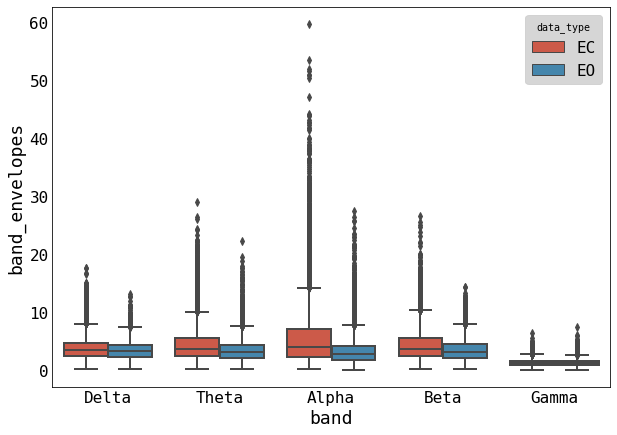

In [7]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="band", y="band_envelopes", hue="data_type")

In [8]:
anovas = []
for (chan, band), df_ in df.groupby(["channels", "band"]):
    anova = pg.rm_anova(
        data=df_, dv="band_envelopes", within="data_type", subject="subject_id"
    )
    anova["channel"] = chan
    anova["band"] = band
    anovas.append(anova)
anovas = pd.concat(anovas, axis=0)

In [9]:
anovas["p-corr FDR"] = pg.multicomp(anovas["p-unc"].values, method="fdr_by")[1]
anovas["p-corr Holm"] = pg.multicomp(anovas["p-unc"].values, method="holm")[1]

In [10]:
len(anovas)

305

In [11]:
anovas[(anovas["p-corr Holm"] < 0.05) & (anovas["band"] == "Gamma")]

,Source,ddof1,ddof2,F,p-unc,np2,eps,channel,band,p-corr FDR,p-corr Holm
0,data_type,1,193,20.286280,1.152777e-05,0.095113,1.0,AF7,Gamma,8.823775e-05,6.340273e-04
0,data_type,1,195,22.289440,4.471180e-06,0.102579,1.0,AF8,Gamma,3.463804e-05,2.593284e-04
0,data_type,1,200,25.336719,1.070649e-06,0.112439,1.0,C1,Gamma,8.499917e-06,6.852155e-05
0,data_type,1,201,18.417338,2.757105e-05,0.083937,1.0,C2,Gamma,2.069170e-04,1.378552e-03
0,data_type,1,200,14.780889,1.622176e-04,0.068818,1.0,C4,Gamma,1.176075e-03,6.780017e-03
0,data_type,1,198,30.132546,1.226562e-07,0.132084,1.0,CP1,Gamma,1.029051e-06,9.444529e-06
0,data_type,1,198,28.026481,3.164083e-07,0.123996,1.0,CP2,Gamma,2.586801e-06,2.246499e-05
0,data_type,1,201,23.383191,2.634800e-06,0.104211,1.0,CP3,Gamma,2.057764e-05,1.580880e-04
0,data_type,1,199,26.696481,5.765345e-07,0.118285,1.0,CP4,Gamma,4.634579e-06,3.862781e-05
0,data_type,1,192,13.607047,2.933288e-04,0.066180,1.0,CP6,Gamma,2.110699e-03,1.143982e-02
